# Logistic Regression: Inference for the Mean Response

This notebook demonstrates how to perform inference about the mean response in logistic regression. 

The data used in this notebook are the LWT dataset from Applied Logistic Regresion book and the `Default` dataset from the `ISLP`.

---
Sources:

- [Applied Logistic Regression](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118548387) by David W. Hosmer, Jr., Stanley Lemeshow, and Rodney X. Sturdivant
- [Introduction to Statistical Learning with Python](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani

## Applied Logistic Regression Example

The goal is to reproduce the example from the book "Applied Logistic Regression" by David W. Hosmer, Jr., Stanley Lemeshow, and Rodney X. Sturdivant. 

The example is about the Low Birth Weight Study from pp. 47-48.

<div class="alert alert-block alert-warning">
<b>DISCLAIMER:</b> These data come from  Hosmer and Lemeshow (2000) Applied Logistic Regression: Second Edition.  These data are copyrighted by John Wiley & Sons Inc. and must be acknowledged and used accordingly.
</div>

Data source: https://danstan.com/students/lowbirthweightdata.txt

```plain
NAME:  	LOW BIRTH WEIGHT DATA (LOWBWT.DAT)
KEYWORDS:  Logistic Regression
SIZE:  189 observations, 11 variables

SOURCE:  Hosmer and Lemeshow (2000) Applied Logistic Regression: Second 
	Edition.  These data are copyrighted by John Wiley & Sons Inc. and must 
	be acknowledged and used accordingly. Data were collected at Baystate
	Medical Center, Springfield, Massachusetts during 1986.


DESCRIPTIVE ABSTRACT:

The goal of this study was to identify risk factors associated with
giving birth to a low birth weight baby (weighing less than 2500 grams).
Data were collected on 189 women, 59 of which had low birth weight babies
and 130 of which had normal birth weight babies.  Four variables which were
thought to be of importance were age, weight of the subject at her last
menstrual period, race, and the number of physician visits during the first
trimester of pregnancy.


NOTE:

This data set consists of the complete data.  A paired data set
created from this low birth weight data may be found in lowbwtm11.dat and
a 3 to 1 matched data set created from the low birth weight data may be
found in mlowbwt.dat.
```

In [3]:
import pandas as pd
from fisher_scoring import FisherScoringLogisticRegression

# Source: https://danstan.com/students/lowbirthweightdata.txt
dataset = pd.read_csv("lwt.csv")

features = ['LWT', 'RACE']
label = 'LOW'

race_dummies = (
    pd.get_dummies(dataset[features[1]], prefix='RACE')
    .astype(int)
)
X = pd.concat([dataset['LWT'], race_dummies], axis=1)
X.drop(columns='RACE_1', inplace=True)
y = dataset[label]

lr_model = FisherScoringLogisticRegression()
lr_model.fit(X, y)

lr_model.display_summary(style='dodger_blue1')

╭── Fisher Scoring Logistic Regression Fit ──╮
│                                            │
│         Total Fisher Scoring Iterations: 6 │
│         Log Likelihood: -111.6295          │
│         Beta 0 = intercept (bias): True    │
│                                            │
╰────────────────────────────────────────────╯

                         Fisher Scoring Logistic Regression Summary                          
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃        Parameter ┃ Estimate ┃ Std. Error ┃ Wald Statistic ┃ P-value ┃ Lower CI ┃ Upper CI ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ intercept (bias) │ 0.8058   │ 0.8452     │ 0.9534         │ 0.3404  │ -0.8507  │ 2.4622   │
│              LWT │ -0.0152  │ 0.0064     │ -2.3641        │ 0.0181  │ -0.0278  │ -0.0026  │
│           RACE_2 │ 1.0811   │ 0.4881     │ 2.2151         │ 0.0268  │ 0.1245   │ 2.0376   │
│           RACE_3 │ 0.4806   │ 0.3567     │ 1.3475         │ 0.1778  │ -0.2185  │ 1.1797   │
└──────────────────┴──────────┴────────────┴────────────────┴─────────┴──────────┴──────────┘

In [4]:
# Create a covariance matrix of the estimated coefficients
import numpy as np
information_matrix = lr_model.information_matrix['information'][-1]
information_matrix_inv = np.linalg.inv(information_matrix)

columns = ['Intercept'] + lr_model.feature_names
cov_matrix = pd.DataFrame(information_matrix_inv.round(6), columns=columns, index=columns)

# Adjust rounding per book example (P 42):
cov_matrix.iloc[0, 0] = cov_matrix.iloc[0, 0].round(4)
cov_matrix.iloc[2, 0] = cov_matrix.iloc[2, 0].round(4)
cov_matrix.iloc[0, 2] = cov_matrix.iloc[0, 2].round(4)
cov_matrix.iloc[3, 0] = cov_matrix.iloc[3, 0].round(4)
cov_matrix.iloc[0, 3] = cov_matrix.iloc[0, 3].round(4)
cov_matrix.iloc[1, 3] = cov_matrix.iloc[1, 3].round(5)
cov_matrix.iloc[3, 1] = cov_matrix.iloc[3, 1].round(5)
cov_matrix.iloc[1, 2] = cov_matrix.iloc[1, 2].round(6)
cov_matrix.iloc[2, 1] = cov_matrix.iloc[2, 1].round(6)
cov_matrix.iloc[0, 1] = cov_matrix.iloc[0, 1].round(4)
cov_matrix.iloc[1, 0] = cov_matrix.iloc[1, 0].round(4)
display(cov_matrix)

,Intercept,LWT,RACE_2,RACE_3
Intercept,0.7143,-0.005200,0.022600,-0.103500
LWT,-0.0052,0.000041,-0.000647,0.000360
RACE_2,0.0226,-0.000647,0.238195,0.053200
RACE_3,-0.1035,0.000360,0.053200,0.127216


In [5]:
# 2.5 CONFIDENCE INTERVAL ESTIMATION
# PP 41-42.
import numpy as np

betas = lr_model.beta.flatten().round(3)  # Rounding in the example
x = np.array([1, 150.0, 0, 0])

g = np.dot(betas, x).round(4)
# g(LWT=150, RACE=White) = -1.44
# The estimated logit for a 150 pound white woman is:
print(g)

p = 1 / (1 + np.exp(-g))
# And the estimated logistic probability is:
print(p.round(3))
# The interpretation of the fitted value is that the estimated
# proportion of low birthweight babies among 150 pound white women is 0.191.

var = (x @ cov_matrix @ x.T).round(4)
# In order to estimate the variance of this estimated logit we need to obtain
# the estimated covariance matrix.
print(var)

# The standard error of the estimated logit is:
se = np.sqrt(var).round(4)
print(se)

# The 95 percent confidence interval for the estimated logit is:
print((g - 1.96 * se).round(3), (g + 1.96 * se).round(3))

# The associated confidence interval for the fitted value is (0.120, 0.289)
p_lower = 1 / (1 + np.exp(-(g - 1.96 * se)))
p_upper = 1 / (1 + np.exp(-(g + 1.96 * se)))
print(p_lower.round(3), p_upper.round(3))

-1.444
0.191
0.0768
0.2771
-1.987 -0.901
0.121 0.289


In [6]:
results = {
    'threshold': [],
    'p': [],
    'p_lower': [],
    'p_upper': [],
}

# 3.9 INTERPRETATION OF THE FITTED VALUES
for i in range(90, 250, 1):
    x = np.array([1, i, 0, 0])
    g = np.dot(betas, x).round(4)
    p = 1 / (1 + np.exp(-g))
    var = (x @ cov_matrix @ x.T).round(4)
    se = np.sqrt(var).round(4)
    p_lower = 1 / (1 + np.exp(-(g - 1.96 * se)))
    p_upper = 1 / (1 + np.exp(-(g + 1.96 * se)))
    results['threshold'].append(i)
    results['p'].append(p)
    results['p_lower'].append(p_lower)
    results['p_upper'].append(p_upper)

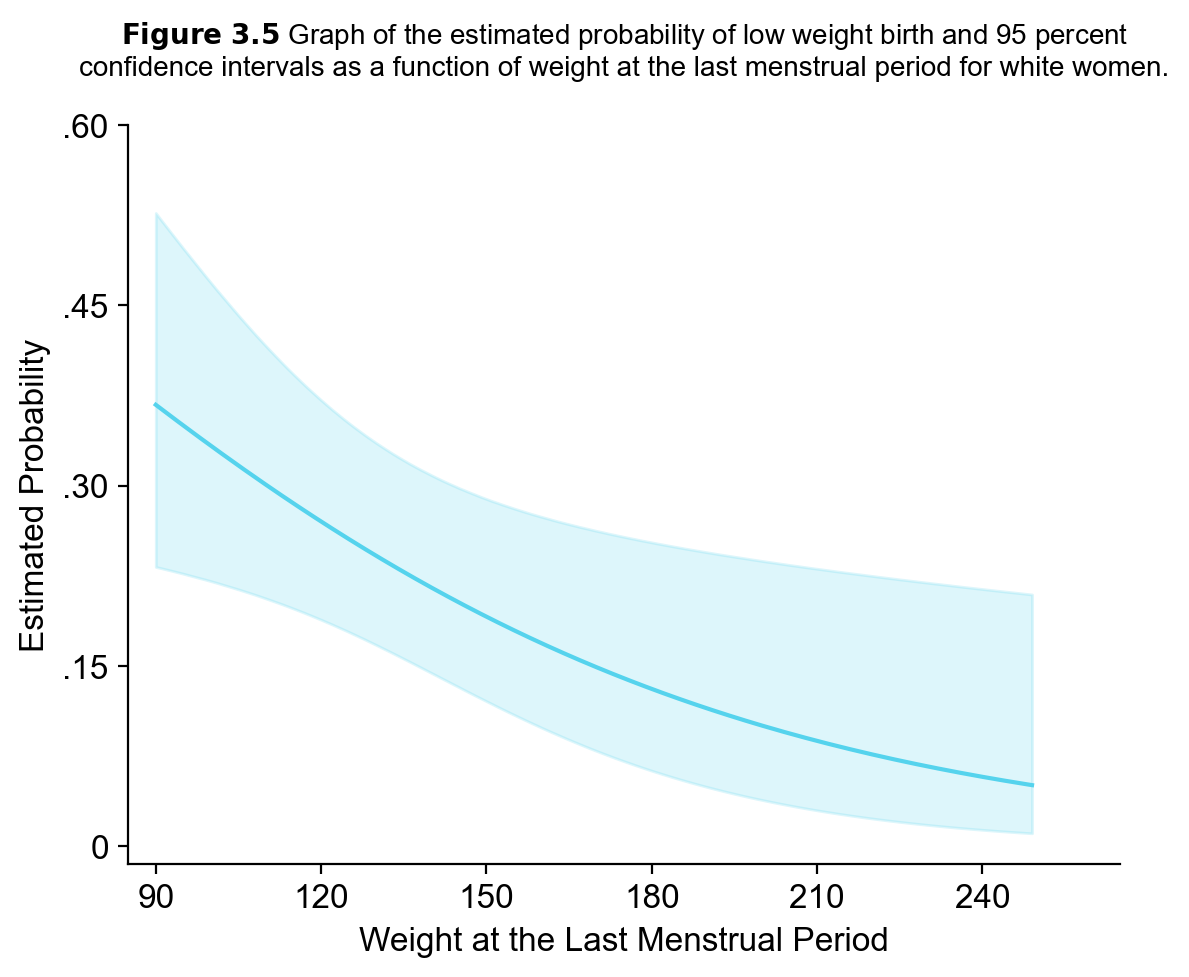

In [7]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
%config InlineBackend.figure_format = 'retina'

# Set font to Arial
plt.rcParams['font.sans-serif'] = "Arial"

plt.plot(
    pd.Series(results['threshold']),
    results['p'],
    color='#55d3ed'
)
plt.fill_between(
    pd.Series(results['threshold']),
    pd.Series(results['p_lower']),
    pd.Series(results['p_upper']),
    color='#55d3ed',
    alpha=0.2
)
plt.ylabel("Estimated Probability")
plt.xlabel("Weight at the Last Menstrual Period")

plt.gca().xaxis.set_major_locator(MultipleLocator(30))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))
plt.gca().set_xlim(85, 265)
plt.gca().set_yticks([0, 0.15, 0.3, 0.45, 0.6])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}".lstrip('0') if y != 0 else '0'))

plt.title(
    # 0.5, -0.1,
    r"$\mathbf{Figure\ 3.5}$" 
    + " Graph of the estimated probability of low weight birth and 95 percent\n"
    "confidence intervals as a function of weight at the last menstrual period for white women.",
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    y=1.05
)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

## Introduction to Statistical Learning Example

The goal is to apply the same inference techniques to the `Default` dataset from the `ISLP` book provided in 4.3.4 Multiple Logistic Regression.

4 Classification (P. 144):

* A student is riskier than a non-student if no information about the student’s credit card balance is available. 
* This is because the default rate for students is higher than for non-students. However, if the credit card balance is known, then a student is less risky than a non-student with the same credit card balance!

/var/folders/k_/yz8rvp25185_js60dw8vhnj40000gn/T/ipykernel_20195/1584598618.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_student'] = Default['student'].map({'No': 0, 'Yes': 1})


╭── Fisher Scoring Logistic Regression Fit ───╮
│                                             │
│         Total Fisher Scoring Iterations: 10 │
│         Log Likelihood: -785.7724           │
│         Beta 0 = intercept (bias): True     │
│                                             │
╰─────────────────────────────────────────────╯

                         Fisher Scoring Logistic Regression Summary                          
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃        Parameter ┃ Estimate ┃ Std. Error ┃ Wald Statistic ┃ P-value ┃ Lower CI ┃ Upper CI ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ intercept (bias) │ -10.8690 │ 0.4923     │ -22.0793       │ 0.0000  │ -11.8339 │ -9.9042  │
│          balance │ 0.0057   │ 0.0002     │ 24.7365        │ 0.0000  │ 0.0053   │ 0.0062   │
│           income │ 0.0030   │ 0.0082     │ 0.3698         │ 0.7115  │ -0.0130  │ 0.0191   │
│       is_student │ -0.6468  │ 0.2363     │ -2.7376        │ 0.0062  │ -1.1098  │ -0.1837  │
└──────────────────┴──────────┴────────────┴────────────────┴─────────┴──────────┴──────────┘

None

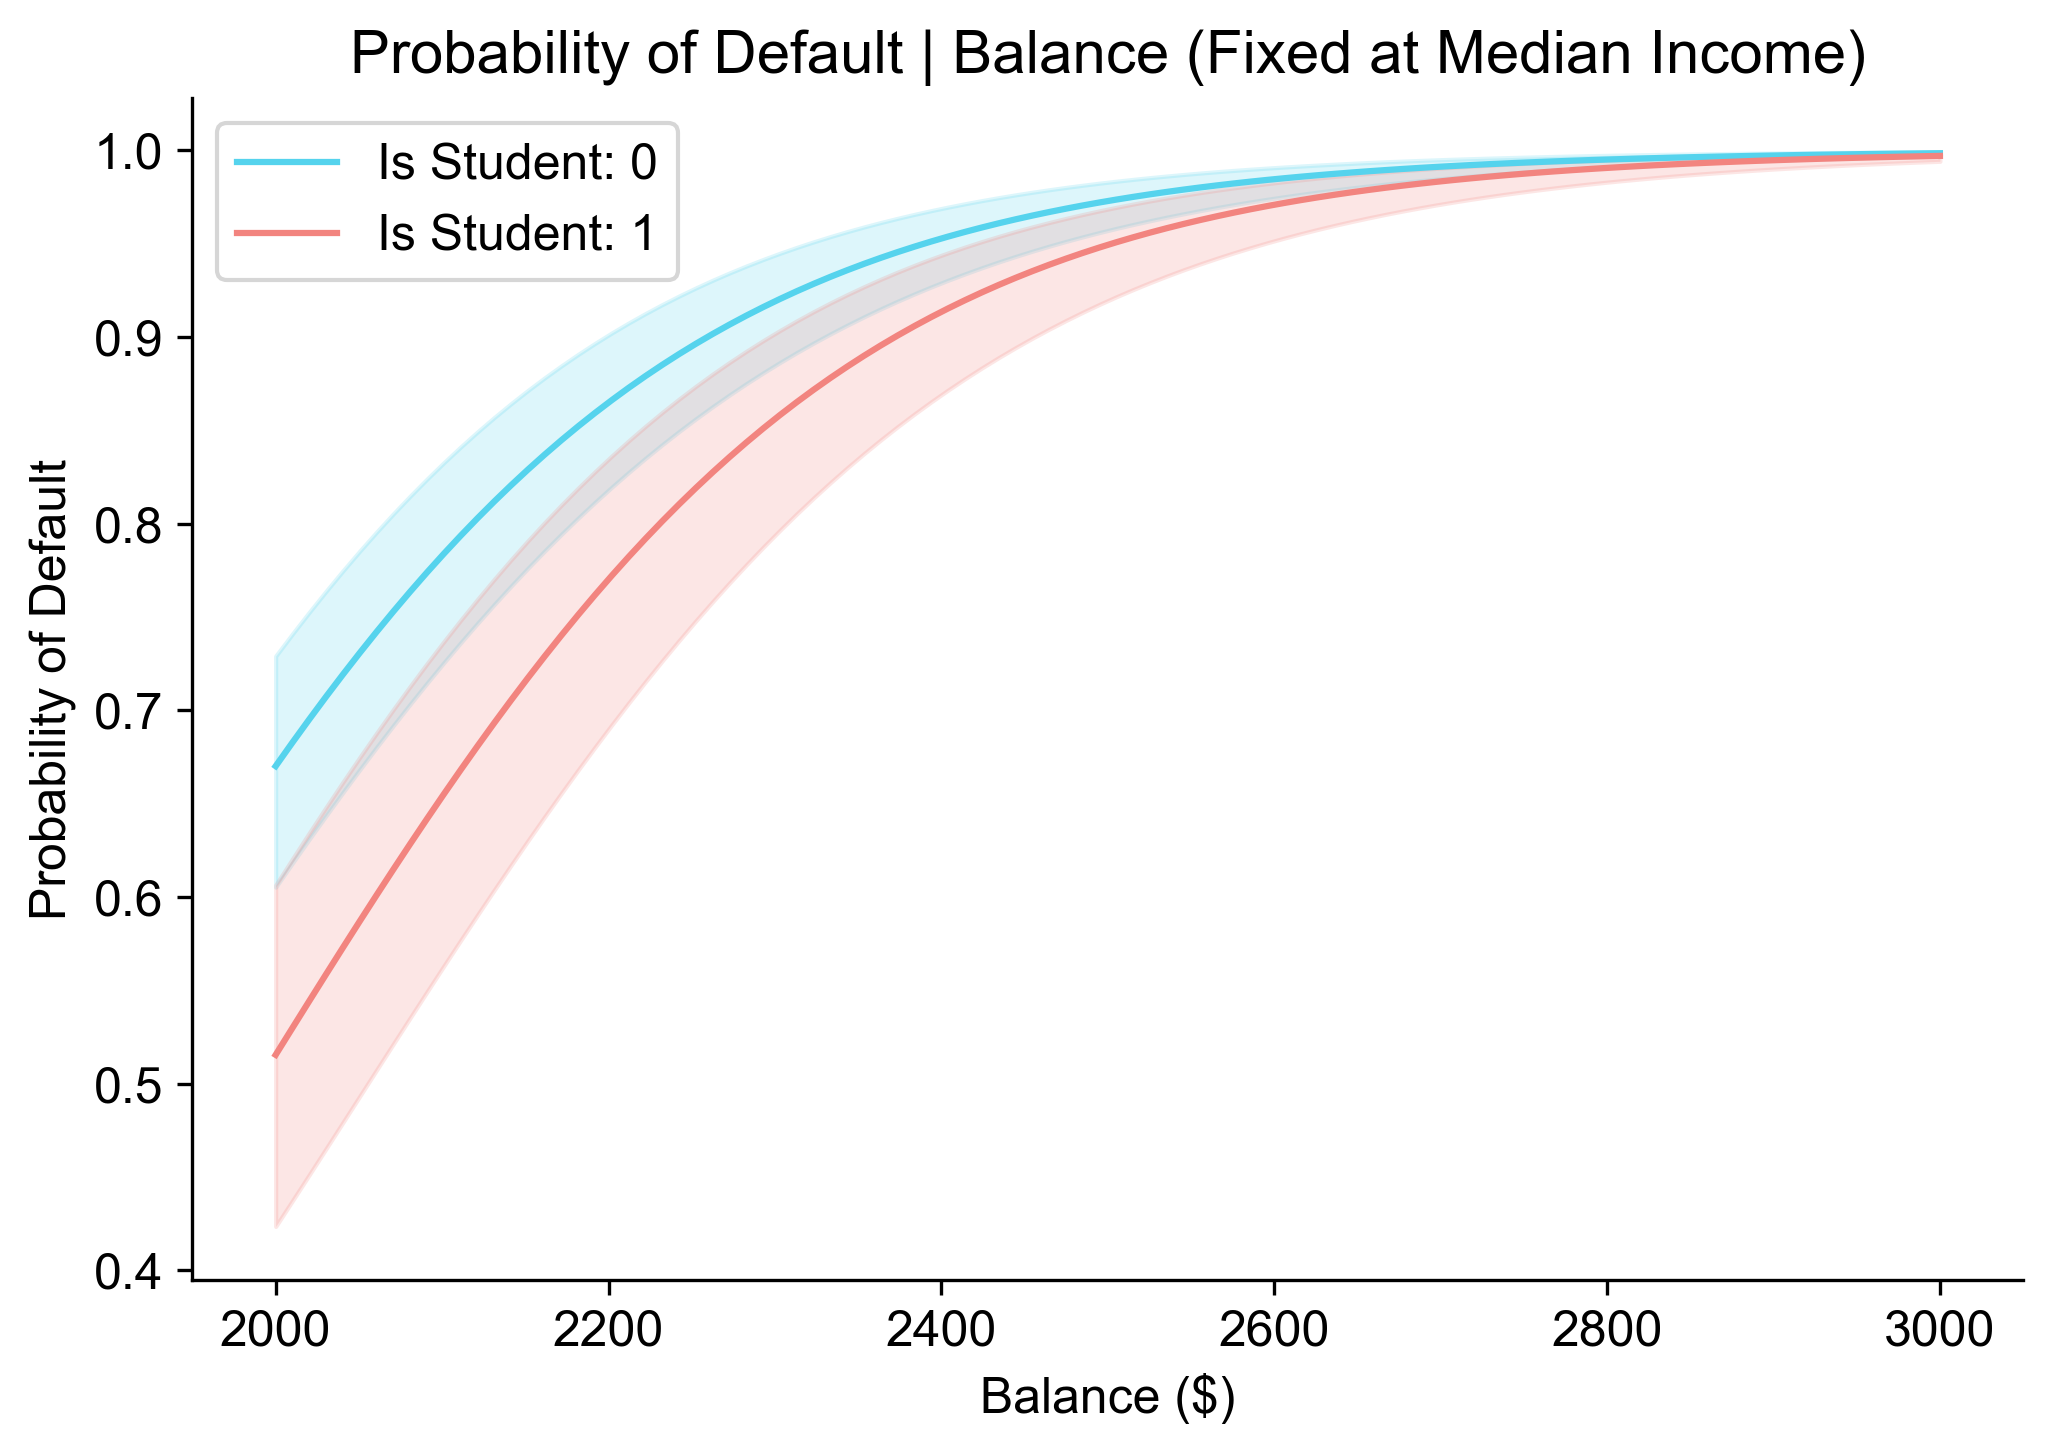

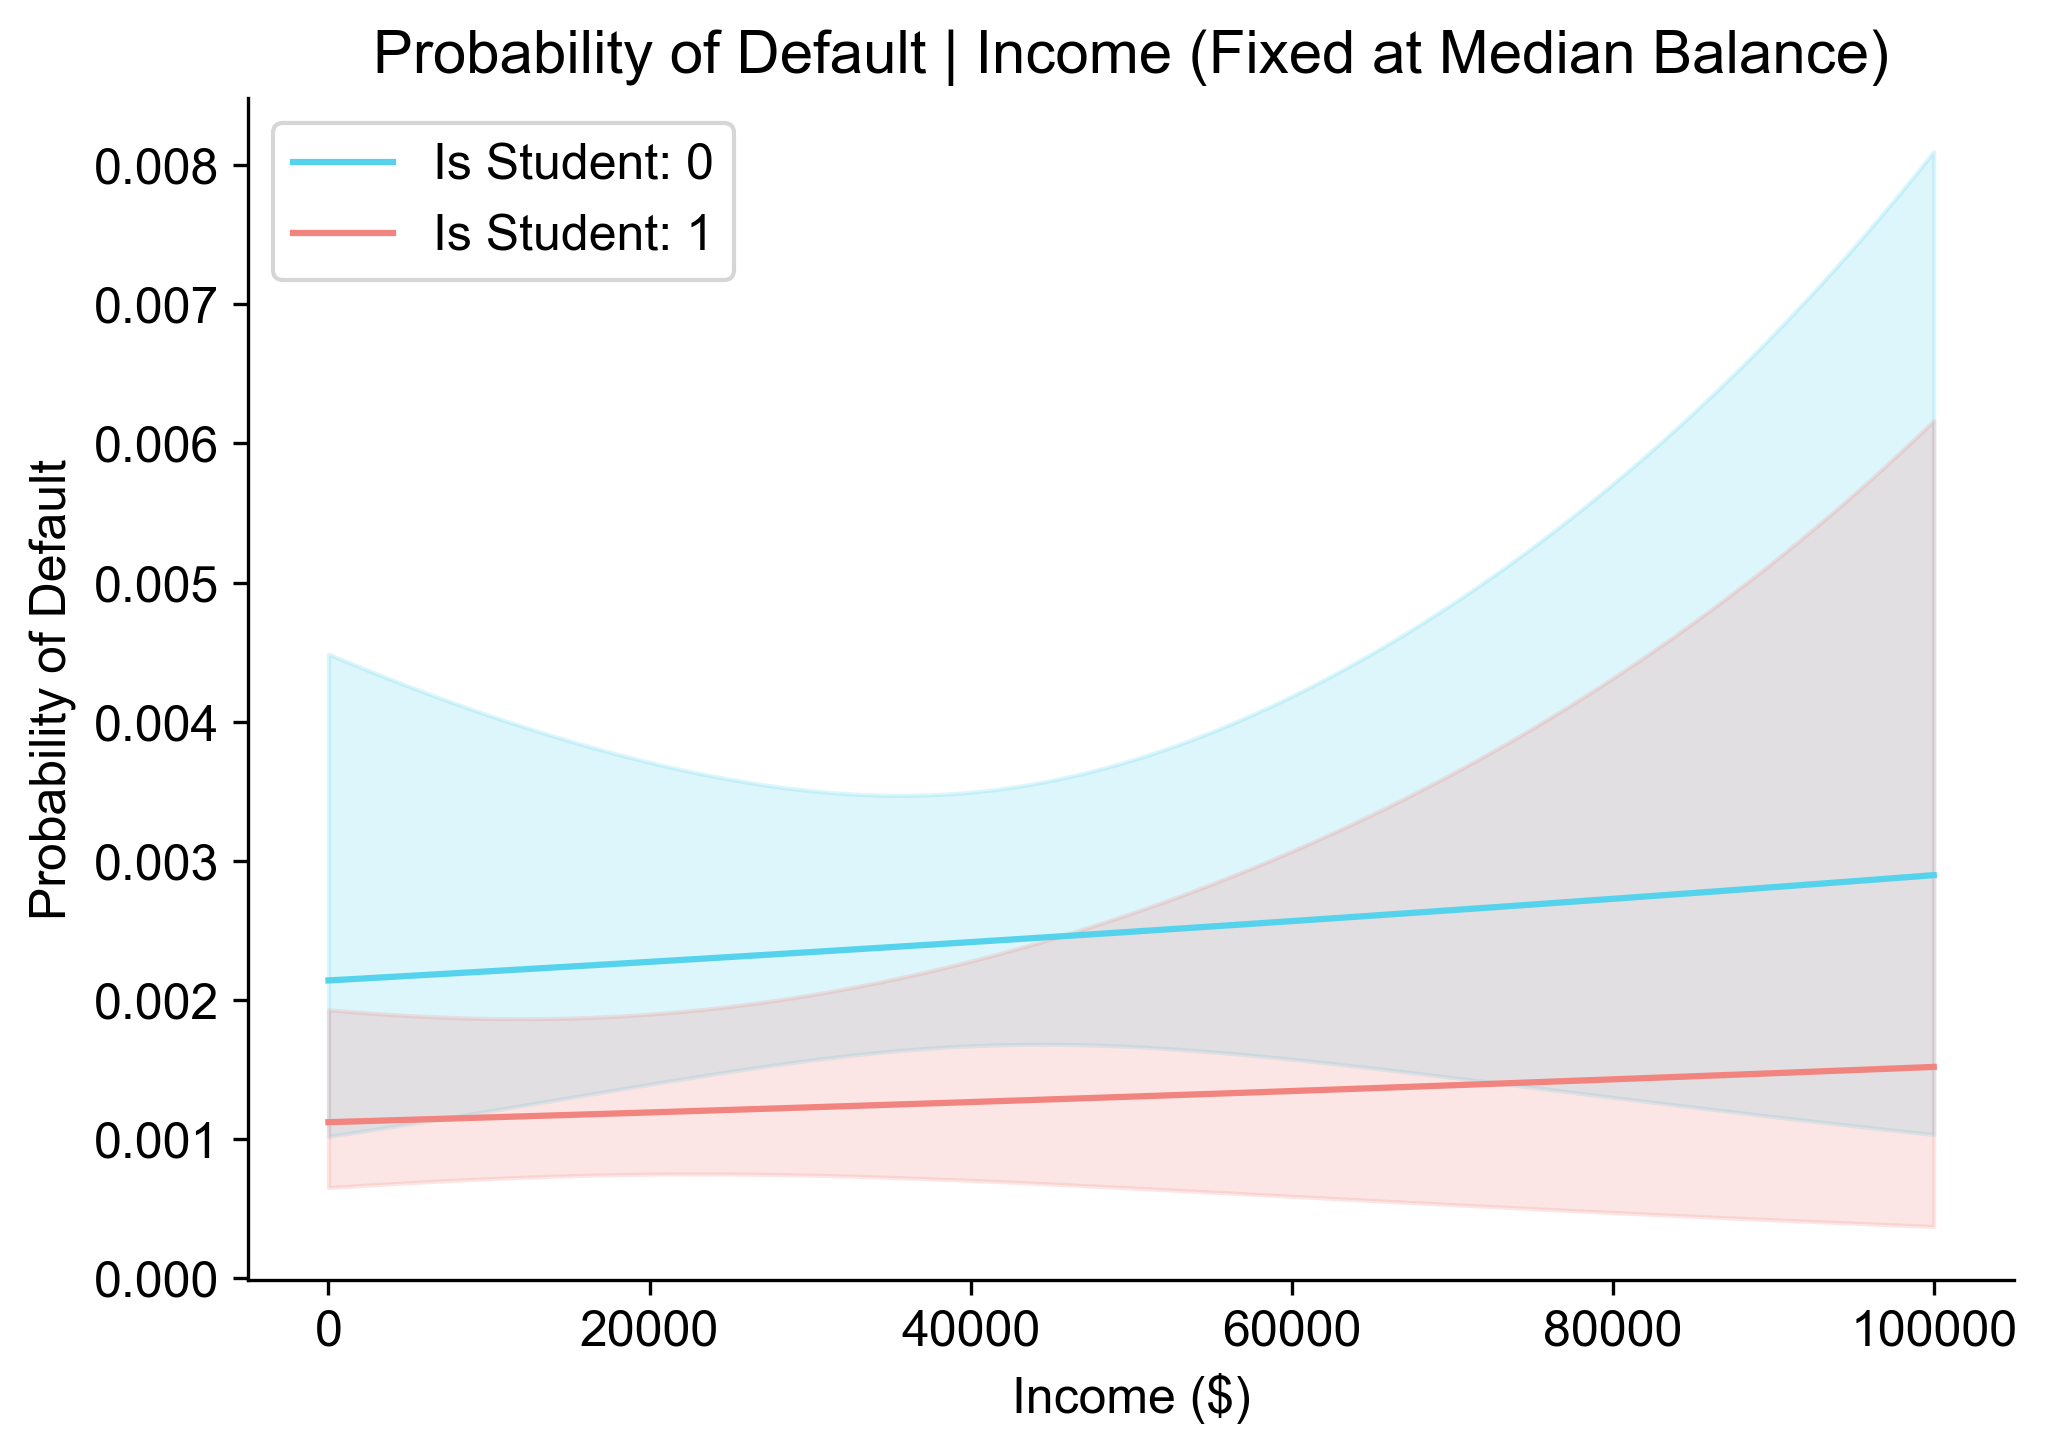

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fisher_scoring import FisherScoringLogisticRegression
from ISLP import load_data
from sklearn.model_selection import train_test_split

# Set font to Comic Shanns
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 12})

# Load data
Default = load_data('Default')
features = ['balance', 'income']
label = 'default'

# Add is_student feature
X, y = Default[features], Default[label].map({'No': 0, 'Yes': 1})
X['is_student'] = Default['student'].map({'No': 0, 'Yes': 1})

# Train/test split
ix_train, ix_test = train_test_split(X.index, stratify=y, test_size=0.3, random_state=0)

# Function to simulate predictions and CIs for a single feature
def simulate_feature_plot(model, feature, fixed_values, feature_range, confidence_method="logit", steps=100):
    """
    Simulate predictions and CIs for a single feature while keeping others fixed.
    
    Args:
        model: Trained model with the logistic regression model.
        feature: Feature to vary (string).
        fixed_values: Dictionary of fixed values for other features.
        feature_range: Tuple (min, max) for the feature to simulate.
        confidence_method: Method to compute confidence intervals ("logit" or "proba").
        steps: Number of points to simulate.
        
    Returns:
        A pandas DataFrame with simulated probabilities and CIs.
    """
    # Generate a range of values for the selected feature
    values = np.linspace(*feature_range, steps)

    # Prepare the DataFrame for simulation
    X_sim = pd.DataFrame({feat: [fixed_values.get(feat, 0)] * len(values) for feat in X.columns})
    X_sim[feature] = values

    # Compute predictions and confidence intervals
    cis = model.predict_ci(X_sim, method=confidence_method)
    X_sim = np.hstack([np.ones((X_sim.shape[0], 1)), X_sim])
    probas = model.logistic_function(X_sim @ model.beta.flatten())

    return pd.DataFrame(
        {
            'feature_value': values,
            'p': probas,
            'p_lower': cis[:, 0],
            'p_upper': cis[:, 1],
        }
    )

# Plotting for each subgroup
def plot_simulation_results(model, fixed_values, feature, feature_range, title, xlabel, colors, ax, model_params=None):
    """
    Plot simulation results for both is_student groups.
    """
    if model_params is None:
        model_params = {'gamma': 0}
    
    for is_student, color in zip([0, 1], colors):
        fixed_values['is_student'] = is_student
        simulated_results = simulate_feature_plot(
            model, feature, fixed_values, feature_range, confidence_method="logit"
        )
        label = f"Is Student: {is_student}"
        ax.plot(
            simulated_results['feature_value'],
            simulated_results['p'],
            label=label,
            color=color
        )
        ax.fill_between(
            simulated_results['feature_value'],
            simulated_results['p_lower'],
            simulated_results['p_upper'],
            color=color,
            alpha=0.2
        )
    # Disable spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Probability of Default")
    ax.legend()

# Fit a model
model = FisherScoringLogisticRegression()

# Fit as in the book (/1000 for income)
X_for_summary = X.copy()
X_for_summary['income'] /= 1000
model.fit(X_for_summary, y)
display(model.display_summary(style='dodger_blue1'))

# Fit the model
model.fit(X, y)

# Plot for balance (fixed income)
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
fixed_values = {'income': X['income'].median()} # np.quantile(X['income'], 0.05)
feature_range = (2000, 3000)  # Range for balance
plot_simulation_results(
    model,
    fixed_values, 'balance', feature_range,
    "Probability of Default | Balance (Fixed at Median Income)",
    "Balance ($)", ['#55d3ed', '#f2847f'], ax
)
plt.tight_layout()
plt.show()

# Plot for income (fixed balance)
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
fixed_values = {'balance': X['balance'].median()}
feature_range = (0, 100_000)  # Range for income
plot_simulation_results(
    model,
    fixed_values, 'income', feature_range,
    "Probability of Default | Income (Fixed at Median Balance)",
    "Income ($)", ['#55d3ed', '#f2847f'], ax
)
plt.tight_layout()
plt.show()

The variables **student** and **balance** are correlated. Students tend to hold higher levels of debt, which is in turn associated with higher probability of default. In other words, students are more likely to have large credit card balances, which, as we know from the left-hand panel of Figure 4.3, tend to be associated with high default rates. 

Thus, even though an individual student with a given credit card balance will tend to have a lower probability of default than a non-student with the same credit card balance, the fact that students on the whole tend to have higher credit card balances means that overall, students tend to default at a higher rate than non-students.

P. 144:

For example, a student with a credit card balance of $1,500 and an income of $40,000 has an estimated probability of default of 0.058.

A non-student with the same balance and income has an estimated probability of default of 0.105.

In [10]:
student_1_X = pd.DataFrame({'balance': [1500], 'income': [40_000], 'is_student': [1]})
student_0_X = pd.DataFrame({'balance': [1500], 'income': [40_000], 'is_student': [0]})

probability_student_1 = model.predict_proba(student_1_X)
probability_student_0 = model.predict_proba(student_0_X)

print(f"Probability of default for student: {probability_student_1[0, 1]:.3f}")
print(f"Probability of default for non-student: {probability_student_0[0, 1]:.3f}")

Probability of default for student: 0.058
Probability of default for non-student: 0.105
